## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:

import warnings
warnings.simplefilter("once")
'''
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet
!pip install yellowbrick=="0.9.0" --quiet
!pip install numpy=="1.16.0" --quiet
!pip install yellowbrick
'''

'\n!pip install pandas=="0.24.0" --quiet\n!pip install seaborn=="0.9.0" --quiet\n!pip install scipy=="1.2.0" --quiet\n!pip install yellowbrick=="0.9.0" --quiet\n!pip install numpy=="1.16.0" --quiet\n!pip install yellowbrick\n'

In [2]:
import pandas as pd
import seaborn as sns
import yellowbrick
import scipy
import numpy as np
%matplotlib inline
print("Usando pandas %s" % pd.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando numpy %s" % np.__version__)

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from Py

Usando pandas 1.0.5
Usando yellowbrick 0.9.1
Usando seaborn 0.10.1
Usando scipy 1.4.1
Usando numpy 1.18.5


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [4]:
# solução
enem = pd.read_csv('enem2017-1.csv',sep=';',encoding='utf-8')

In [5]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [6]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [7]:
# solução
todas_as_notas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3",
                  "NU_NOTA_COMP4", "NU_NOTA_COMP5"]

In [8]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [9]:
# solução
enem.dropna(inplace=True)
enem['NU_NOTA_MT'].head()

0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [10]:
# solução e impressão
nota_total = enem.sum(axis=1)
nota_total.head()

0   2681.400
3   2949.500
4   2786.700
5   2795.000
6   2858.500
dtype: float64

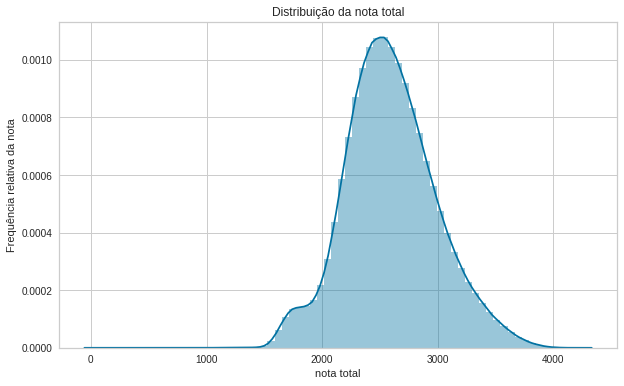

In [11]:
# solução histograma e descrição
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Distribuição da nota total') #Adicionando um título 
sns.distplot(nota_total,bins=70) #Plotando o gráfico
plt.grid(True) #Colocando um grid para facilitar leitura
plt.xlabel('nota total') #Adicionando legenda do eixo x
plt.ylabel('Frequência relativa da nota') #Adicionando legenda do eixo x
plt.show()

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição
desvio padrão: 396.483


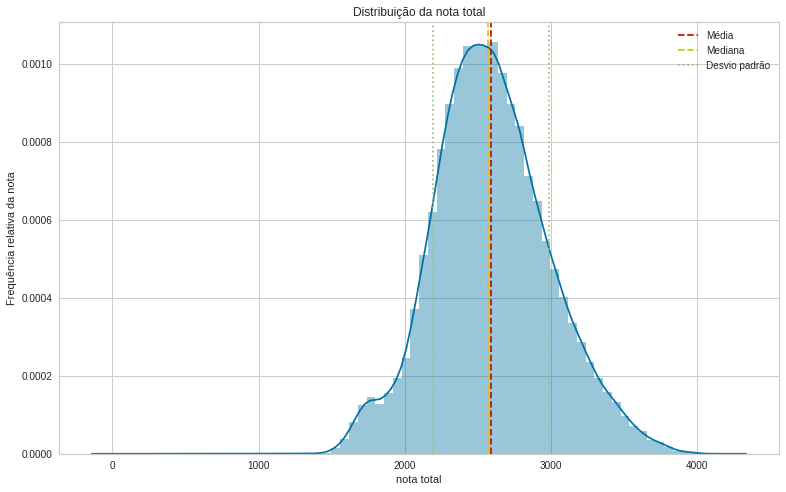

In [12]:
import matplotlib.pyplot as plt

# solução sua função de sampling

def eda_sample(enem):
    # seed
    SEED = 745
    np.random.seed(SEED)
    # 1% de sample em enem_eda
    enem_eda = enem.sample(frac=0.01,random_state=SEED)
    print("Enem EDA sampling tem a distribuição")
    # descreva a nota_total
    nota_total = enem_eda.sum(axis=1)
    # plote o histograma da nota_total e mostre com plt.show()
    #Adicionando os valores media,desvio padrão e mediana para plotar no gráfico
    mean,std,median = nota_total.mean(),nota_total.std(),nota_total.median()
    desvio1 = mean-std
    desvio2 = mean+std
    print(f'desvio padrão: {std:.3f}')
    fig = plt.figure(figsize=(10,6)) #Setando uma figura para adicionar o gráfico  
    eixo = fig.add_axes([0,0,1,1]) #Ajustando os eixos
    eixo.set_title('Distribuição da nota total') #Adicionando título
    sns.distplot(nota_total,bins=70) #Plotando gráfico
    eixo.grid(True) #Adicionando grid para facilitar a figura
    eixo.set_xlabel('nota total') #Legendando eixo x
    eixo.set_ylabel('Frequência relativa da nota') #Legendando eixo y
    eixo.axvline(mean,color='r',linestyle='--') #Adicionando a reta que indica a média
    eixo.axvline(median,color='y',linestyle='--') #Adicionando a reta que indica a mediana
    #Adicionando a reta que indica desvio padrão
    eixo.axvline(desvio1,color='g',linestyle=':') 
    eixo.axvline(desvio2,color='g',linestyle=':')
    #legendando as retas adicionadas
    eixo.legend({'Média':mean,'Mediana':median,'Desvio padrão':desvio1})
    plt.show()
    return enem_eda, nota_total

enem_eda, nota_total = eda_sample(enem)

O gráfico acima mostra que a maioria das notas totais estão distribuidas entre 4000 e 6000. Além disso a mediana está proxima da média, oque significa que o gráfico não possui valores muito discrepantes da média.

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [13]:
# solução
enem_eda['nota_total'] = nota_total
correlacoes = enem_eda.corr()

In [14]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.610,0.568,0.553,0.342,0.317,0.386,0.379,0.350,0.731
NU_NOTA_CH,0.610,1.000,0.707,0.571,0.396,0.357,0.436,0.425,0.391,0.792
NU_NOTA_LC,0.568,0.707,1.000,0.547,0.443,0.371,0.458,0.448,0.398,0.777
NU_NOTA_MT,0.553,0.571,0.547,1.000,0.361,0.330,0.397,0.389,0.352,0.763
NU_NOTA_COMP1,0.342,0.396,0.443,0.361,1.000,0.771,0.832,0.862,0.594,0.726
NU_NOTA_COMP2,0.317,0.357,0.371,0.330,0.771,1.000,0.859,0.795,0.634,0.694
NU_NOTA_COMP3,0.386,0.436,0.458,0.397,0.832,0.859,1.000,0.866,0.674,0.774
NU_NOTA_COMP4,0.379,0.425,0.448,0.389,0.862,0.795,0.866,1.000,0.653,0.760
NU_NOTA_COMP5,0.350,0.391,0.398,0.352,0.594,0.634,0.674,0.653,1.000,0.675
nota_total,0.731,0.792,0.777,0.763,0.726,0.694,0.774,0.760,0.675,1.000


## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [15]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes['nota_total']

In [16]:
print(correlacao_com_nota_total)

NU_NOTA_CN      0.731
NU_NOTA_CH      0.792
NU_NOTA_LC      0.777
NU_NOTA_MT      0.763
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.694
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.760
NU_NOTA_COMP5   0.675
nota_total      1.000
Name: nota_total, dtype: float64


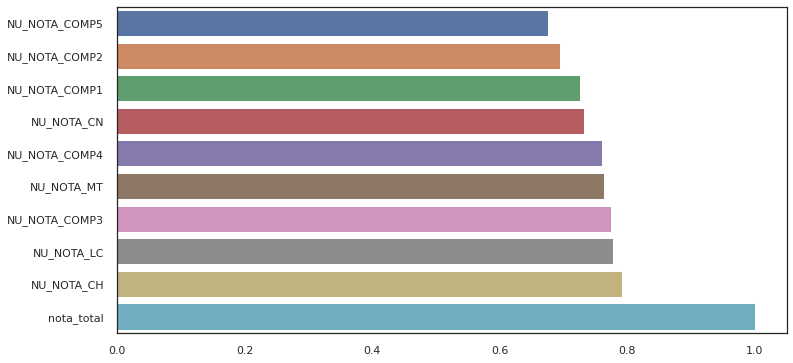

In [17]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.corr()["nota_total"].sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(enem_eda)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [18]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[['NU_NOTA_MT','NU_NOTA_LC','nota_total']]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [19]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    SEED = 42367
    np.random.seed(SEED)
    # train_test_split
    x=dados.drop('nota_total',axis=1)
    y=dados['nota_total']
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=SEED)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [20]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6774613706172


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [22]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    modelo = LinearRegression()
    modelo.fit(train_x,train_y)
    # calcule o r2_score com os dados de teste
    r2_score = modelo.score(test_x,test_y)
    # calcule a predição e os dois tipos de erros
    test_pred = modelo.predict(test_x)
    mse = mean_squared_error(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    return modelo

In [23]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.7692311471988329
mse 36308.89210227679
mae 142.102755998379


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

    O erro médio absoluto menor que o desvio padrão mostra que o modelo de LinearRegression se ajustou bem aos dados colhidos. Oque poderá garantir predições precisas.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

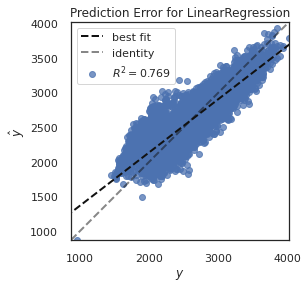

In [24]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

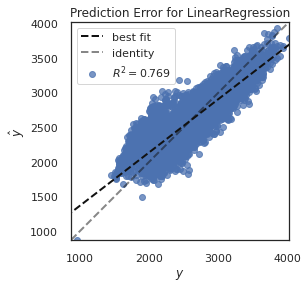

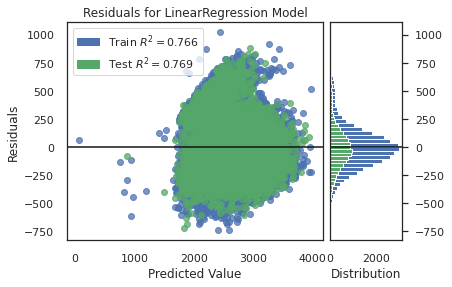

In [25]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [26]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 9) (33201,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 1.0
mse 1.924445000606224e-25
mae 3.445429237537726e-13


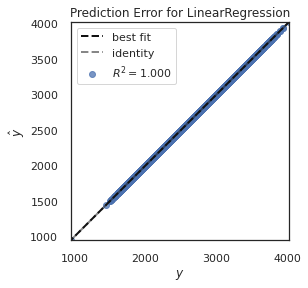

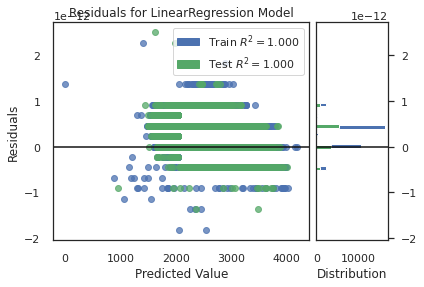

In [27]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','nota_total']
regressao_completa_para(notas)

    Modelo acima se mostrou bastante preciso devido a alta quantidade de dados fornecidos no treino(Mais de o triplo de dados fornecidos se comparados com o teste feito anteriormente).

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8475200762655194
mse 23991.00672138306
mae 109.06531946670808


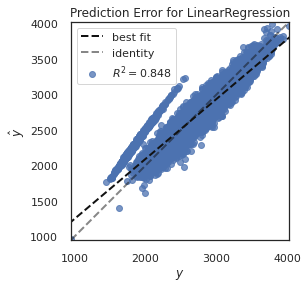

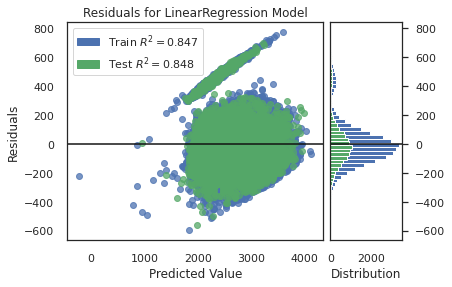

In [28]:
# solução 2: teste outra combinação
#Teste: Se a prova não tivesse redação
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','nota_total']
regressao_completa_para(notas)


    A falta de notas de redação gerou um aumento do erro das notas, principalmente na região da ponta do gráfico. Além disso formou uma segunda onda no gráfico de erros residuais.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 7) (33201,) (11067, 7) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3'
 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.9206799549638477
mse 12480.119920025994
mae 88.20708298435666


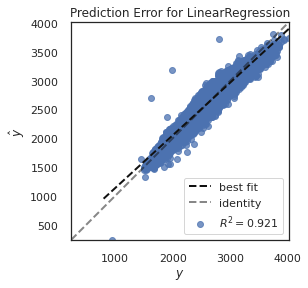

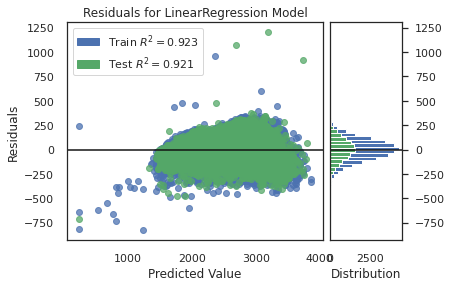

In [29]:
# solução 3: teste outra combinação
#Teste: Se houvesse apenas o primeiro dia do enem(Linguagens, Humanas, Redação)
notas = ['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','nota_total']
regressao_completa_para(notas)


    Mesmo com a falta de dados do segundo dia, o modelo conseguiu ter uma boa precisão das notas totais, com poucos outliers

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.7202105947343931
mse 44021.72651914204
mae 157.47916724667922


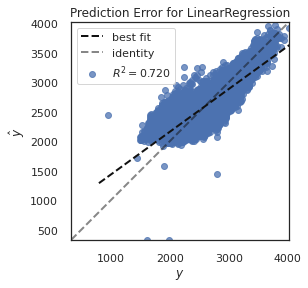

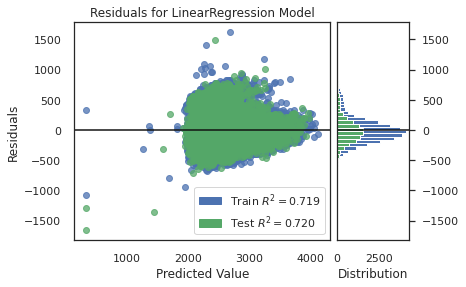

In [30]:
# solução 4: teste outra combinação
#Se houvesse apenas o segundo dia (Ciencias da Natureza,Matemática)
notas = ['NU_NOTA_CN','NU_NOTA_MT','nota_total']
regressao_completa_para(notas)


    O uso de dados do segundo dia gerou um erro bastante consideravel,mais de 10% de diferença do teste R² com os dados de linguagens e matemática(Que possuem a mesma quantidade de dados para treinar o modelo).

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 7) (33201,) (11067, 7) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3'
 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.9465229289377567
mse 8414.017661290569
mae 72.26948814452396


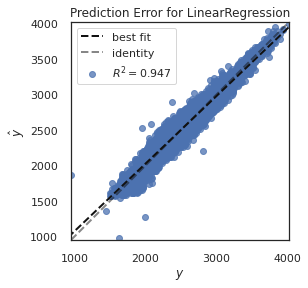

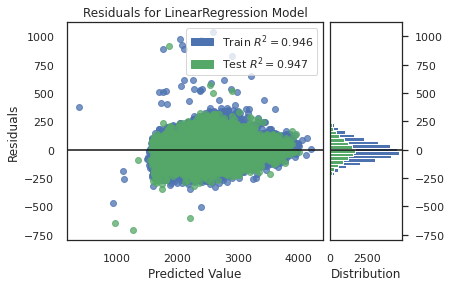

In [31]:
# solução 5: teste outra combinação
# Se fosse apenas Ciências da Natureza,Matemática,Redação
notas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','nota_total']
regressao_completa_para(notas)


    Esse modelo possuiu a melhor acurácia com uma redução do numero de dados no modelo.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 1) (33201,) (11067, 1) (11067,)
Usando colunas ['NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.58244416791283
mse 65697.72943748323
mae 197.63243402264334


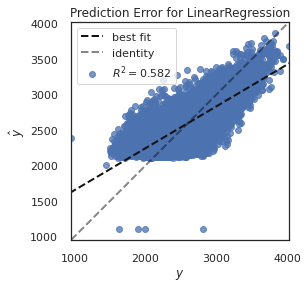

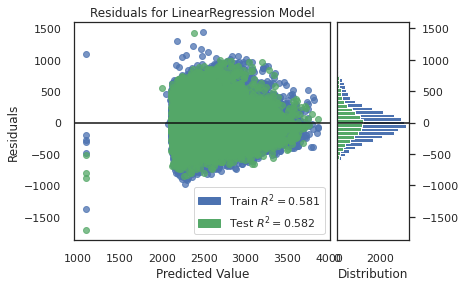

In [32]:
# solução 6: teste outra combinação
# Apenas Matemática
notas = ['NU_NOTA_MT','nota_total']
regressao_completa_para(notas)


    Modelo com alto erros, tanto que no gráfico de erro residual percebe-se uma distribuição 'equilibrada'.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 6) (33201,) (11067, 6) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3'
 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8834131261611513
mse 18343.637676284852
mae 108.31387769548391


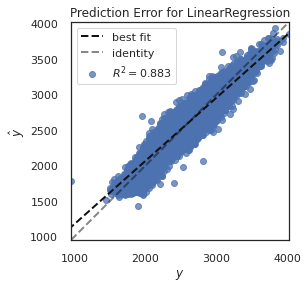

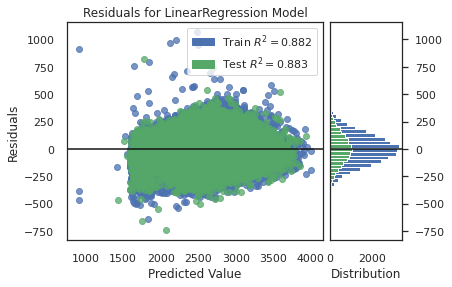

In [33]:
# solução 7: teste outra combinação
# Apenas matemática e redação
notas = ['NU_NOTA_MT','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','nota_total']
regressao_completa_para(notas)


    Redução considerável da acurácia do modelo se comparada com a solução 5 que possui apenas 1 coluna a mais. Portanto entre todos as soluções oque melhor se adequou com o modelo "perfeito"(solução 1), foi a solução 5

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.9250752608326931
mse 11788.567812316252
mae 86.18740233062171


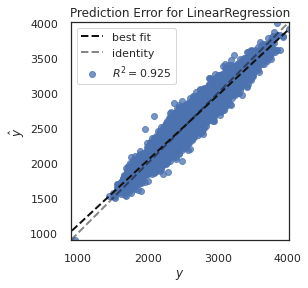

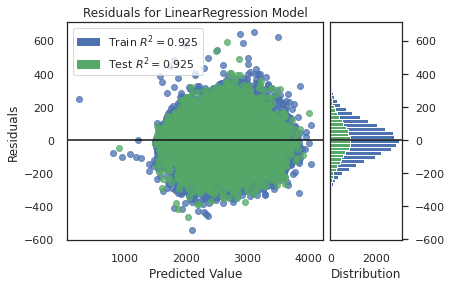

In [34]:
# solução
notas = ['NU_NOTA_LC','NU_NOTA_COMP3','NU_NOTA_MT','nota_total']
regressao_completa_para(notas)


  Mesmo que o modelo esteja bem ajustado, gerou altos erros resíduais para os dados de teste.

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [35]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    # gere os modelos em uma lista
    modelos = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor()]
    return modelos

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [36]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [37]:
# solução

def escolhe_dados(dados, colunas):
    # extraia as colunas
    notas = colunas
    # faça o split
    train_x, test_x, train_y, test_y = split(dados[colunas])
    # plote o histograma de train_y
    sns.distplot(train_y)
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [38]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelo.fit(train_x,train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    test_pred = modelo.predict(test_x)
    # calcule o mse
    mse = mean_squared_error(test_y,test_pred)
    # calcule o mae
    mae = mean_absolute_error(test_y,test_pred)
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [39]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        scaler = StandardScaler()
        pipe = Pipeline([('transformacao',scaler), ('estimador',modelo)])
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.6774613706172


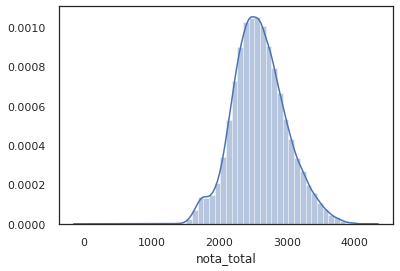

Resultado Pipeline(memory=None,
         steps=[('transformacao',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 11788.567812316254 86.18740233062171
Resultado Pipeline(memory=None,
         steps=[('transformacao',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 11786.673810163153 86.22345492148199
Resultado Pipeline(memory=None,
         steps=[('transformacao',
                 StandardScaler(copy=True, with_mean=True, w

,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",11788.568,86.187,0.010
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",11786.674,86.223,0.010
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",11788.548,86.188,0.008
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",22804.081,118.948,0.179
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",13092.082,90.289,8.265


In [40]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

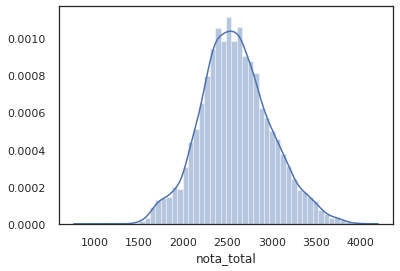

In [41]:
# solução: histograma
sns.distplot(test_y)

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [42]:
# solução

def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = np.quantile(serie,p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y=[]
    for dado in serie:
      if(dado >= quant):
        y.append(1)
      else:
        y.append(0)
    y = pd.Series(y,index=serie.index)
    return y

In [43]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [44]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [45]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2837.8500000000004


0.2500225896810337

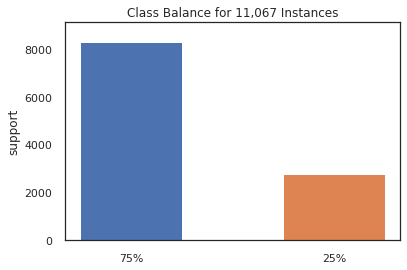

In [46]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

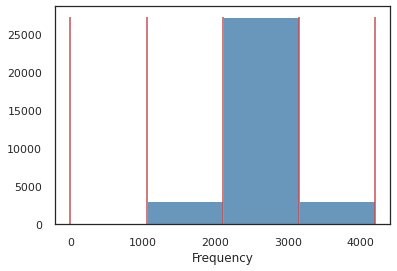

In [47]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [48]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [49]:
# solução

def gera_classificadores():
    # defina seus modelos
    modelos = [DummyClassifier(strategy='most_frequent'),LogisticRegression(),RidgeClassifier(),
               DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
    return modelos

In [50]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [51]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    np.random.seed(SEED)
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados.drop('top_p',axis=1)
    # defina y como somente a coluna top_p
    y = dados['top_p']
    # quebre em treino e teste, usando estratificação baseada em y
    train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [52]:
# código pronto: teste

interesse = enem_eda.loc[:,["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


## Pergunta: implemente o treino e o teste do classificador

In [53]:
# solução:

import time
from sklearn.metrics import accuracy_score
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
  tic = time.time()
  # treine o pipeline
  pipe.fit(train_x,train_y)
  tac = time.time()
  tempo_de_treino = tac - tic
  # calcule a accuracy_score
  test_pred = pipe.predict(test_x)
  accuracy_score1 = accuracy_score(test_y,test_pred)
  print("Resultado", nome, accuracy_score1)
  return accuracy_score1, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [54]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
  interesse =dados.drop('nota_total',axis=1) # selecione somente as colunas especificas de dados
  nota_total =dados['nota_total'] # somente a coluna nota_total
  interesse['top_p'] =top_p(nota_total,p=p) # defina quem está no top p

  colunas.remove("nota_total")
  interesse = interesse[[*colunas, "top_p"]]

  train_x, test_x, train_y, test_y = split_classificacao(interesse)
  train_y.hist()
  plt.show()
  return train_x, test_x, train_y, test_y

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


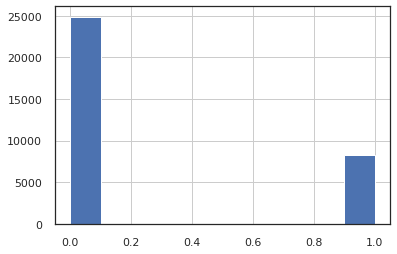

In [55]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)

In [56]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
  
  colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
  train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p)
   
  resultados = []
  for modelo in gera_classificadores():
    nome = type(modelo).__name__
    pipe = make_pipeline(StandardScaler(), modelo)
    accuracy_score1,tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
    resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score1])
        
  resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
  return test_x, test_y, resultados.set_index("tipo")

## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


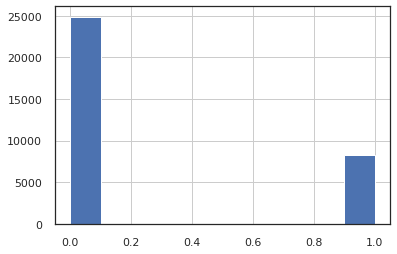

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9070208728652751
Resultado RandomForestClassifier 0.9278937381404174
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.010
LogisticRegression,0.937,0.093
RidgeClassifier,0.920,0.019
DecisionTreeClassifier,0.907,0.113
RandomForestClassifier,0.928,2.683
SVC,0.937,7.413


In [57]:
# solução top 25%
test_x,test_y,notas = analisa_classificacao(enem_eda,p=0.75)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2000542152344809


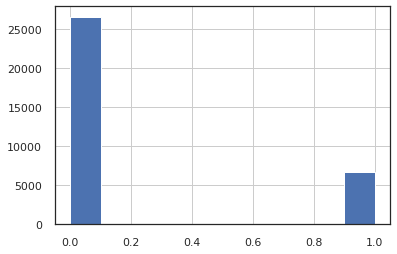

Resultado DummyClassifier 0.7999457847655191
Resultado LogisticRegression 0.9454233306225716
Resultado RidgeClassifier 0.9288876841059004
Resultado DecisionTreeClassifier 0.9212071925544412
Resultado RandomForestClassifier 0.9394596548296738
Resultado SVC 0.9455136893467064


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.010
LogisticRegression,0.945,0.068
RidgeClassifier,0.929,0.020
DecisionTreeClassifier,0.921,0.118
RandomForestClassifier,0.939,2.613
SVC,0.946,6.232


In [58]:
# solução top 20%
test_x,test_y,notas = analisa_classificacao(enem_eda,p=0.8)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.10002710761724044


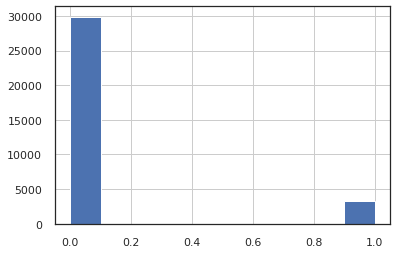

Resultado DummyClassifier 0.8999728923827596
Resultado LogisticRegression 0.9709044908285895
Resultado RidgeClassifier 0.9278937381404174
Resultado DecisionTreeClassifier 0.9571699647600976
Resultado RandomForestClassifier 0.9655733261046354
Resultado SVC 0.9705430559320503


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.012
LogisticRegression,0.971,0.079
RidgeClassifier,0.928,0.018
DecisionTreeClassifier,0.957,0.093
RandomForestClassifier,0.966,2.274
SVC,0.971,3.405


In [59]:
# solução top 10%
test_x,test_y,notas = analisa_classificacao(enem_eda,p=0.9)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3290.7950000000005
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.04996837444655281


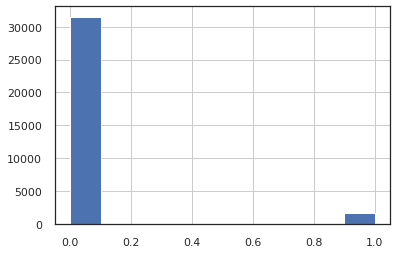

Resultado DummyClassifier 0.9500316255534472
Resultado LogisticRegression 0.9793078521731273
Resultado RidgeClassifier 0.9500316255534472
Resultado DecisionTreeClassifier 0.9723502304147466
Resultado RandomForestClassifier 0.97804283003524
Resultado SVC 0.9793982108972621


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.950,0.007
LogisticRegression,0.979,0.087
RidgeClassifier,0.950,0.018
DecisionTreeClassifier,0.972,0.092
RandomForestClassifier,0.978,2.005
SVC,0.979,1.981


In [60]:
# solução top 5%
test_x,test_y,notas = analisa_classificacao(enem_eda,p=0.95)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


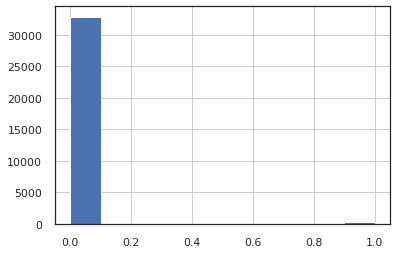

Resultado DummyClassifier 0.9899701816210356
Resultado LogisticRegression 0.9943074003795066
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9914159212071926
Resultado RandomForestClassifier 0.9934941718622933
Resultado SVC 0.9942170416553718


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.007
LogisticRegression,0.994,0.100
RidgeClassifier,0.990,0.017
DecisionTreeClassifier,0.991,0.082
RandomForestClassifier,0.993,1.727
SVC,0.994,0.611


In [61]:
# solução top 1%
test_x,test_y,notas = analisa_classificacao(enem_eda,p=0.99)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


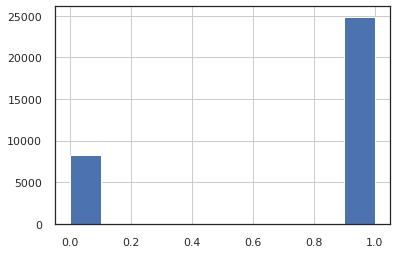

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9208457576579019
Resultado RidgeClassifier 0.9033161651757478
Resultado DecisionTreeClassifier 0.8882262582452336
Resultado RandomForestClassifier 0.9087376886238366
Resultado SVC 0.9225625734164633


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.008
LogisticRegression,0.921,0.070
RidgeClassifier,0.903,0.020
DecisionTreeClassifier,0.888,0.122
RandomForestClassifier,0.909,2.825
SVC,0.923,11.949


In [62]:
# solução bottom 25%
test_x,test_y,notas = analisa_classificacao(enem_eda,p=0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


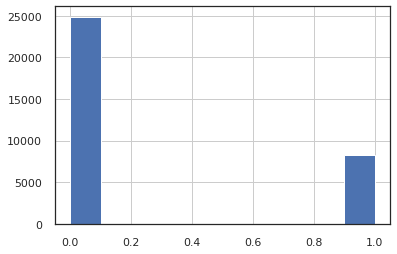

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9070208728652751
Resultado RandomForestClassifier 0.9278937381404174
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.009
LogisticRegression,0.937,0.070
RidgeClassifier,0.920,0.019
DecisionTreeClassifier,0.907,0.112
RandomForestClassifier,0.928,2.724
SVC,0.937,7.684


In [63]:
# código pronto: rodando para top 25%
test_x,test_y,notas = analisa_classificacao(enem_eda,p=0.75)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [64]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9371103280021686


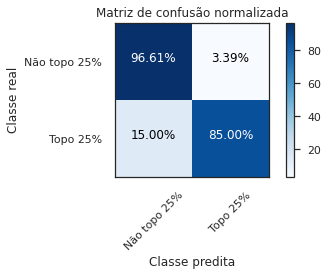

In [65]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9374717628987078


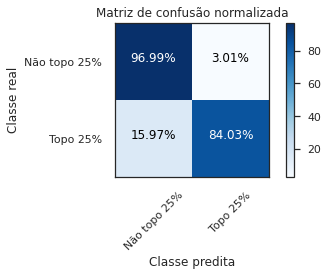

In [66]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [67]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

enem['nota_total'] = enem.sum(axis=1) # Adicionando notas totais ao df enem.
usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382487 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [68]:
def separa_dados_de_classificacao_para_validacao(dados):
    X =dados[['NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP3']] # selecione as 3 colunas
    y = top_p(dados['nota_total'],p=0.75) # calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [69]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X,y = separa_dados_de_classificacao_para_validacao(enem_validacao)
    scores = cross_val_score(modelo,X,y,cv=5,verbose=1,n_jobs=-1) # calcule o cross_val_score
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2839.5
Média da validação 0.2500080433781093


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.0s finished


Acurácia entre [93.48,93.49]
Acurácia do modelo em teste 0.935011786686418


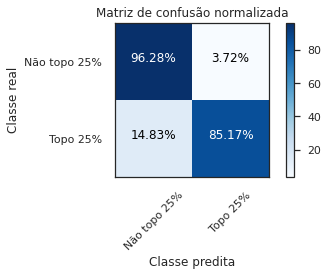

In [70]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [71]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X,y = separa_dados_de_classificacao_para_validacao(enem_validacao)
    scores = cross_val_score(modelo,X,y,cv=5,verbose=1,n_jobs=-1) # calcule o cross_val_score
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    y_pred = modelo.predict(X)
    
    print_confusion_for(X, y, modelo)

In [72]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis=1) # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis=1) # some por coluna
        y_pred_true_false = parcial >= self.top_25_quantile # compare a soma parcial com o self.top25_quantile
        y_pred = pd.Series([1 if(pred == True) else 0 for pred in y_pred_true_false],index=parcial.index) # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2839.5
Média da validação 0.2500080433781093


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished


Acurácia entre [91.87,91.91]
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.9184449377716352


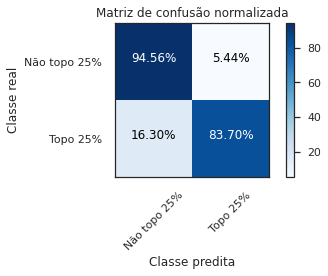

None


In [73]:

print(treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25()))


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

    Comparado os resultados entre os modelos, percebemos que enquanto o DummyClassifier possui os piores resultados, a heurística final possui uma acurácia muito próxima do LogisticRegression, mesmo que a heurística necessite de muito menos poder computacional. Portanto, essa heurística se torna um modelo melhor para os dados colhidos, já que a pequena superação da LogisticRegression, deve ocorrer por conta da aleatoriedade do seed, ou pelos parametros não ajustados.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Utilizando uma nota de corte com a nota da redação, e posteriormente realizar o calculo heurístico diminuiria o tamanho de dados a serem modelados. Oque deixaria o modelo com menos dados "sujos".
    O calculo da nota de corte poderia ser feita utilizando a mesma top_25.

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    A faculdade deveria organizar um conselho para que caso ocorresse uma situação dessa, o jurí confirmaria que o modelo julgou errado e então adicionaria esse dado no modelo para que o mesmo se ajustasse.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!